In [3]:
"""PCA Approximation"""

'PCA Approximation'

Let $K_{X_t} = (K_{X_t}^{i,j})_{1\le i,j \le n}$ be the covariance matrix of $X_t = (X_t^i)_{1 \leq i \leq n}$ where $X_t^i = -\rho^i \int_0^t e^{-b^i (t-s)} \, dB_s$.

As $X_t \sim \mathcal{N}(0,K_{X_t})$, and $K_{X_t} = \sum_{i=1}^{n} \nu^i u^{i} (u^{i})^{\top}$, we can write

$$ X_t = \sum_{i=1}^{n} \sqrt{\nu^i} G^i u^i $$

where $K_{X_t} = U \, \textrm{diag}(\nu^1,\ldots,\nu^n) \, U^T$, $U = [u^1, \dots, u^n]$, and $(G^i)_{i=1,\ldots,n}$ iid N(0,1).


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from utils import compute_inertia, eig_cov_x

# For reproductibility
SEED = 1234

# Set default matplotlib parameters
plt.rcParams["figure.figsize"] = [9.0, 7.0]
sns.set_style(
    style="ticks",
    rc={
        "axes.grid": True,
        "axes.spines.top": False,
        "axes.spines.right": False,
    },
)
sns.set_context(
    context="poster",
    rc={
        "grid.linewidth": 1.0,
        "legend.fontsize": "x-small",
        "legend.title_fontsize": "xx-small",
    },
)
%config InlineBackend.figure_format = 'retina'

# Plot of the first largest eigenvalues $\nu^i$


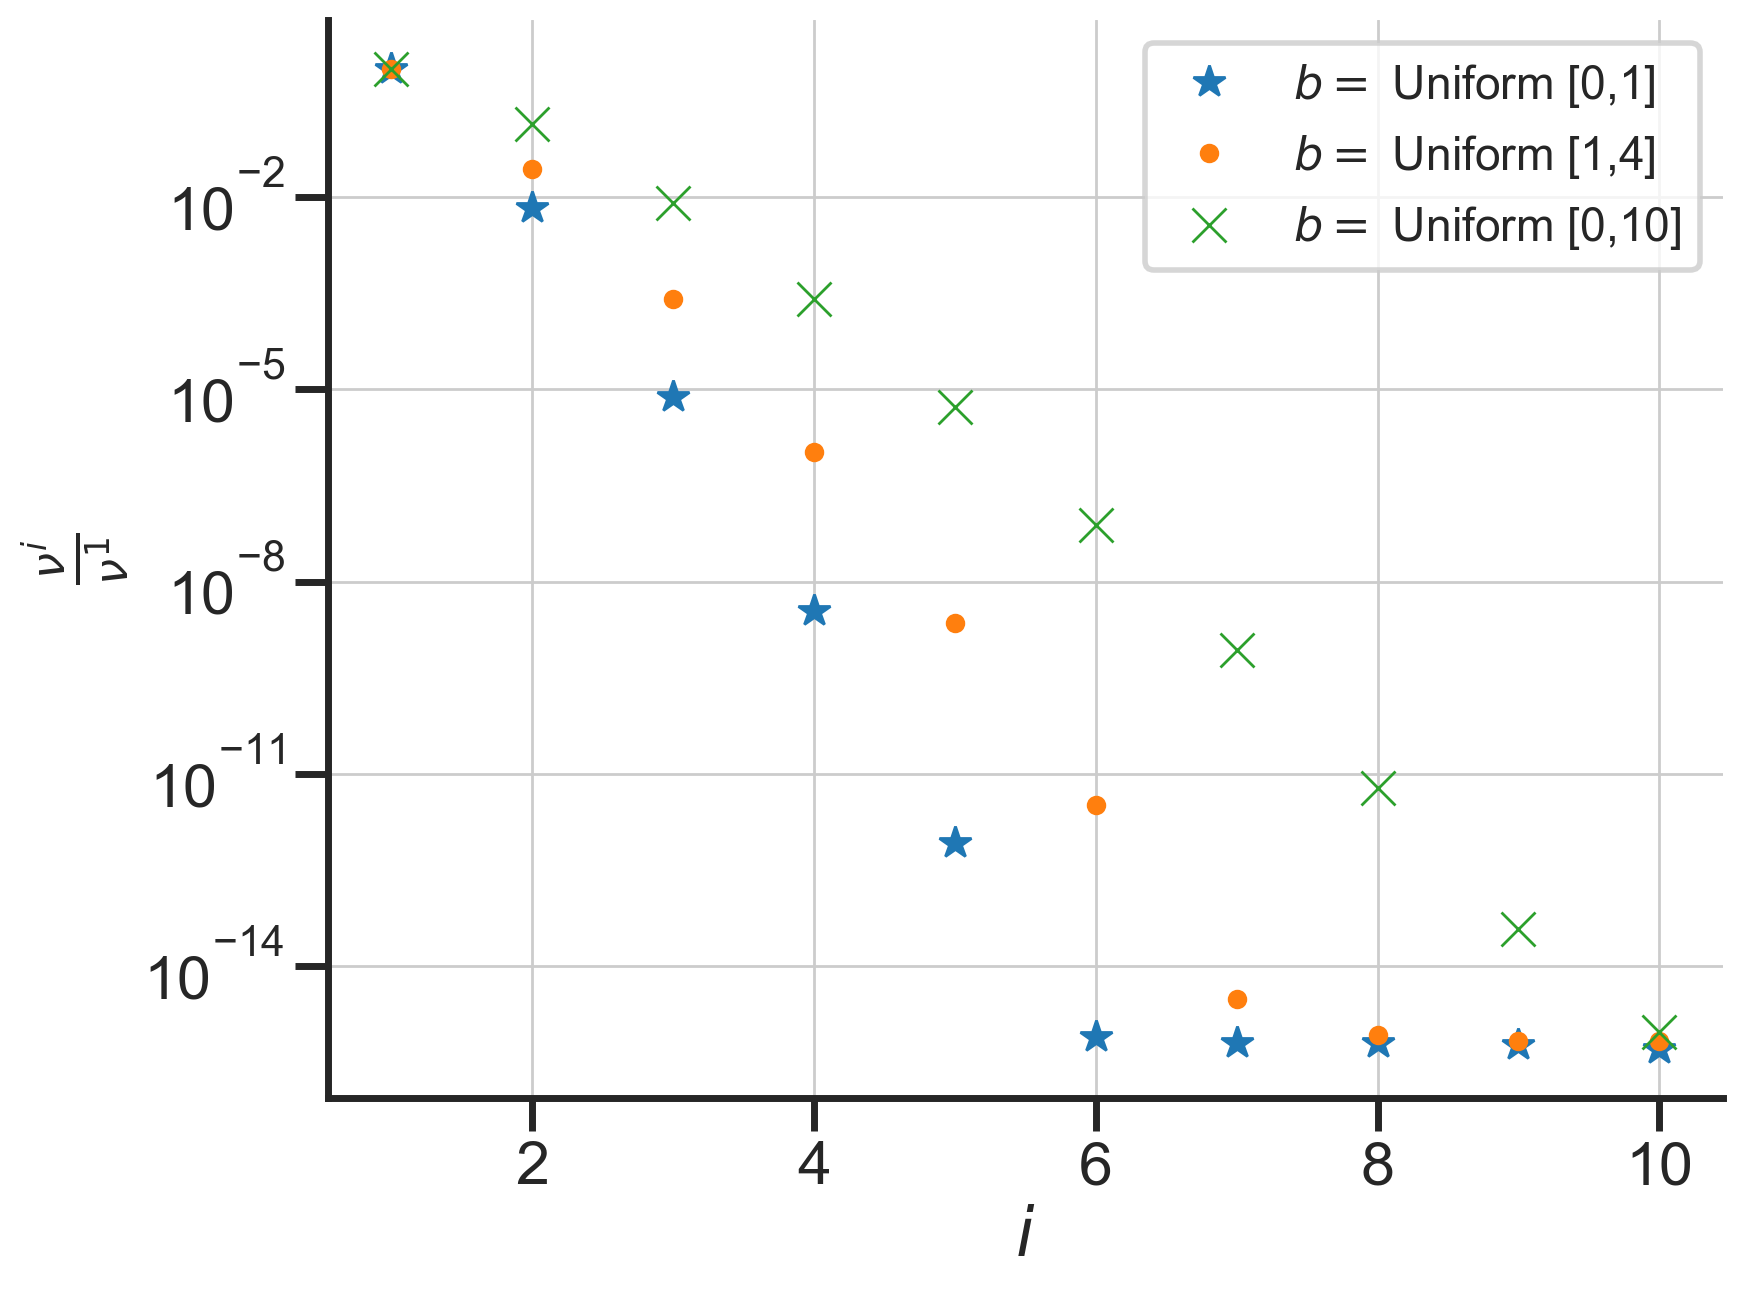

In [2]:
IDX = 10
N = 1000
tab_b_min = [0, 1, 0]
tab_b_max = [1, 4, 10]
markers = ["*", ".", "x"]

fig, ax = plt.subplots()
for i, (b_min, b_max) in enumerate(zip(tab_b_min, tab_b_max)):
    eig_x_b = eig_cov_x(n=N, b_min=b_min, b_max=b_max, seed=SEED)
    ax.plot(
        np.arange(1, IDX + 1),
        eig_x_b[:IDX] / eig_x_b[0],
        markers[i],
        label=f"$b=$ Uniform [{b_min},{b_max}]",
    )
ax.set_xlabel("$i$")
ax.set_ylabel(r"$\frac{\nu^{i}}{\nu^{1}}$")
ax.set_yscale("log")
ax.legend()
plt.show()

# Plots of the inertias


We plot the ratios

$$ \frac{\nu^1}{\sum_{i=1}^{n} \nu^i}, \qquad \frac{\nu^1 + \nu^2}{\sum_{i=1}^{n} \nu^i} $$

Each time, we compute 95% confidence intervals as well


In [6]:
T = 1.0
tab_n = np.arange(100, 1500, 100)
N_MC = 30

In [ ]:
inertia_b01, error_b01 = compute_inertia(
    tab_n=tab_n,
    n_mc=N_MC,
    b_min=0,
    b_max=1,
    t=T,
)
inertia_b14, error_b14 = compute_inertia(
    tab_n=tab_n,
    n_mc=N_MC,
    b_min=1,
    b_max=4,
    t=T,
)
inertia_b010, error_b010 = compute_inertia(
    tab_n=tab_n,
    n_mc=N_MC,
    b_min=0,
    b_max=10,
    t=T,
)

100%|██████████| 14/14 [00:04<00:00,  3.38it/s]


In [8]:
MARKERSIZE = 10
ELINEWIDTH = 1
CAPSIZE = 3

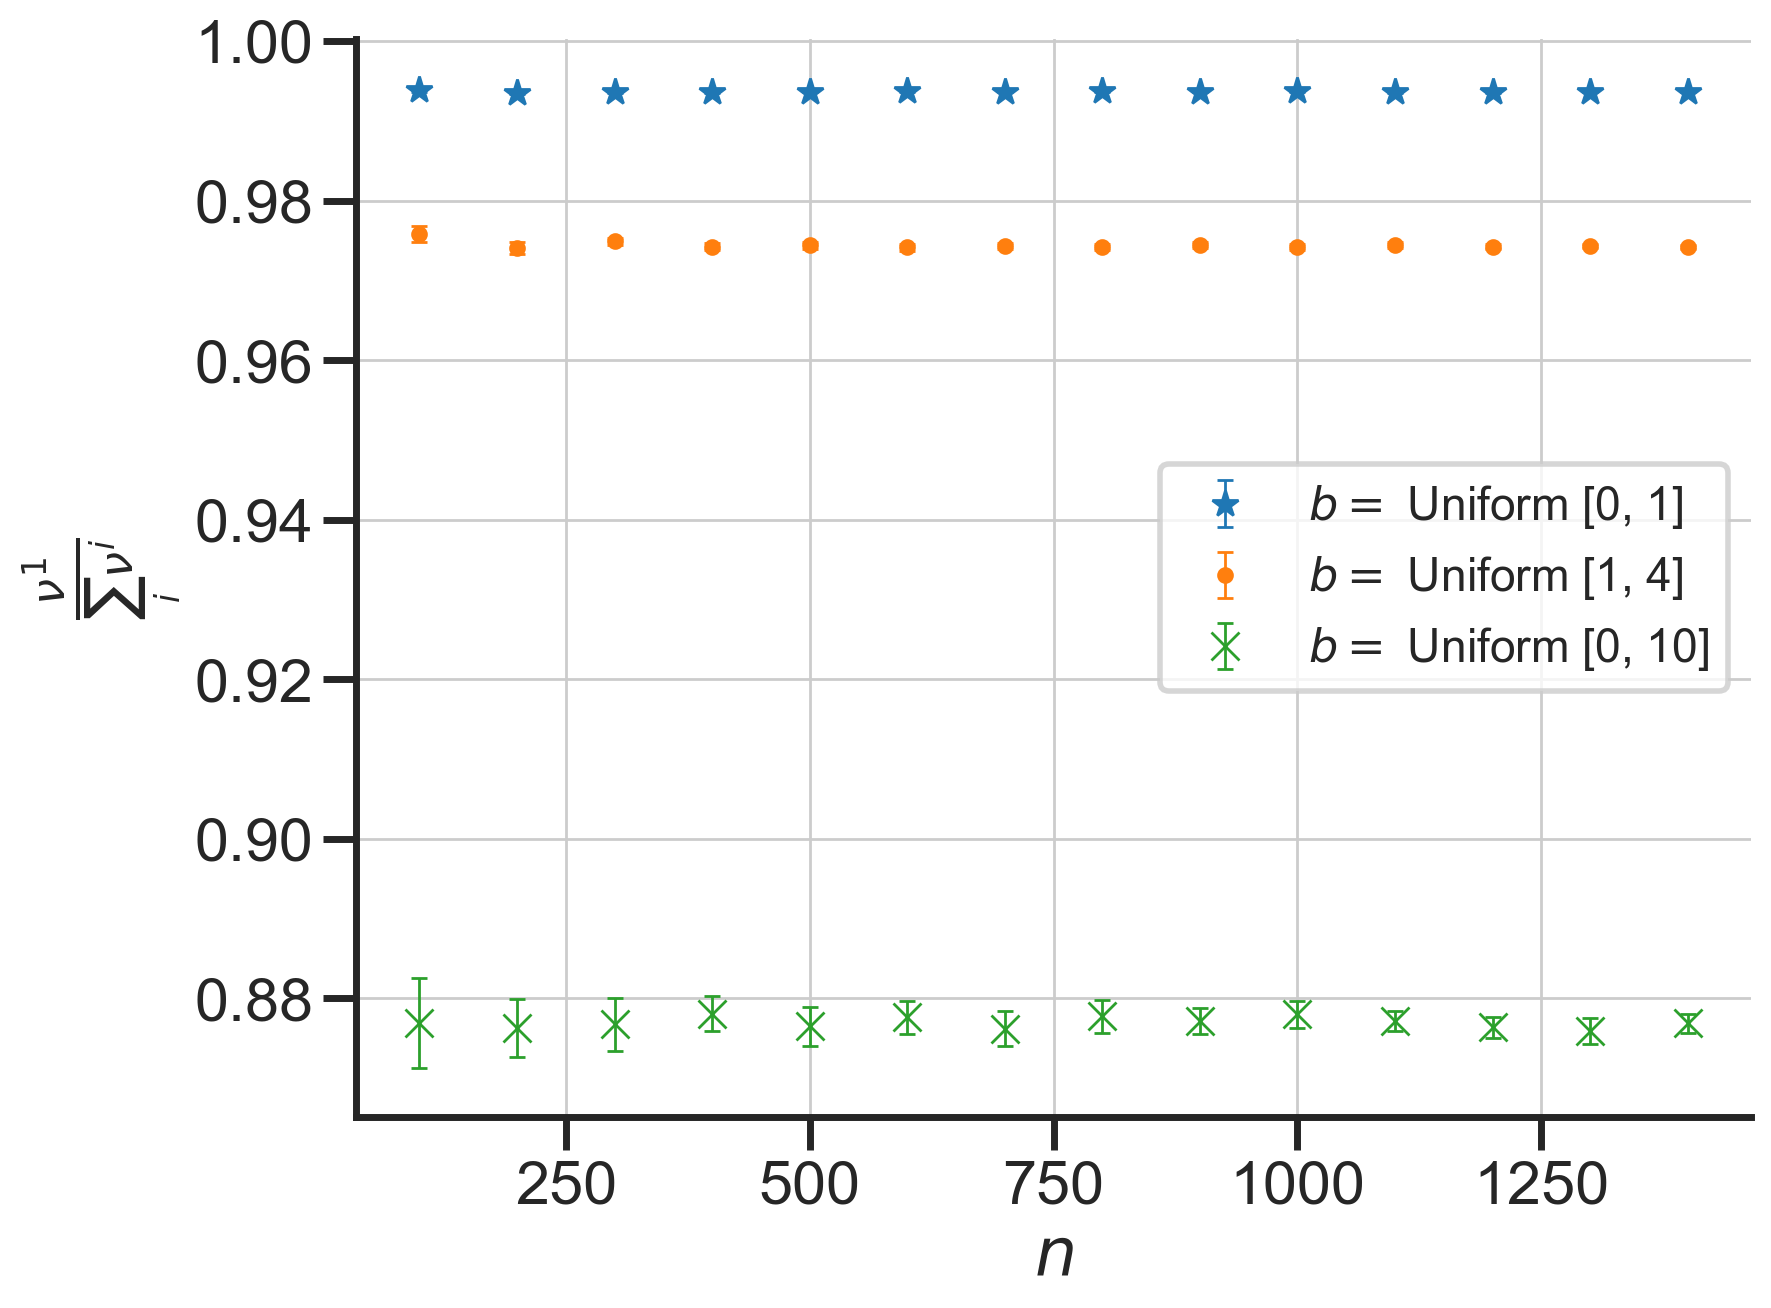

In [9]:
# with one factor
fig, ax = plt.subplots()
ax.errorbar(
    tab_n,
    inertia_b01[:, 0],
    yerr=error_b01[:, 0],
    markersize=MARKERSIZE,
    elinewidth=ELINEWIDTH,
    fmt="*",
    capsize=CAPSIZE,
    label="$b=$ Uniform [0, 1]",
)
ax.errorbar(
    tab_n,
    inertia_b14[:, 0],
    yerr=error_b14[:, 0],
    markersize=MARKERSIZE,
    elinewidth=ELINEWIDTH,
    fmt=".",
    capsize=CAPSIZE,
    label="$b=$ Uniform [1, 4]",
)
ax.errorbar(
    tab_n,
    inertia_b010[:, 0],
    yerr=error_b010[:, 0],
    markersize=MARKERSIZE,
    elinewidth=ELINEWIDTH,
    fmt="x",
    capsize=CAPSIZE,
    label="$b=$ Uniform [0, 10]",
)
ax.set_xlabel("$n$")
ax.set_ylabel(r"$\frac{\nu^1}{\sum_{i} \nu^i}$")
ax.legend()
# ax.set_ylim(0.87, 1.0)
plt.show()

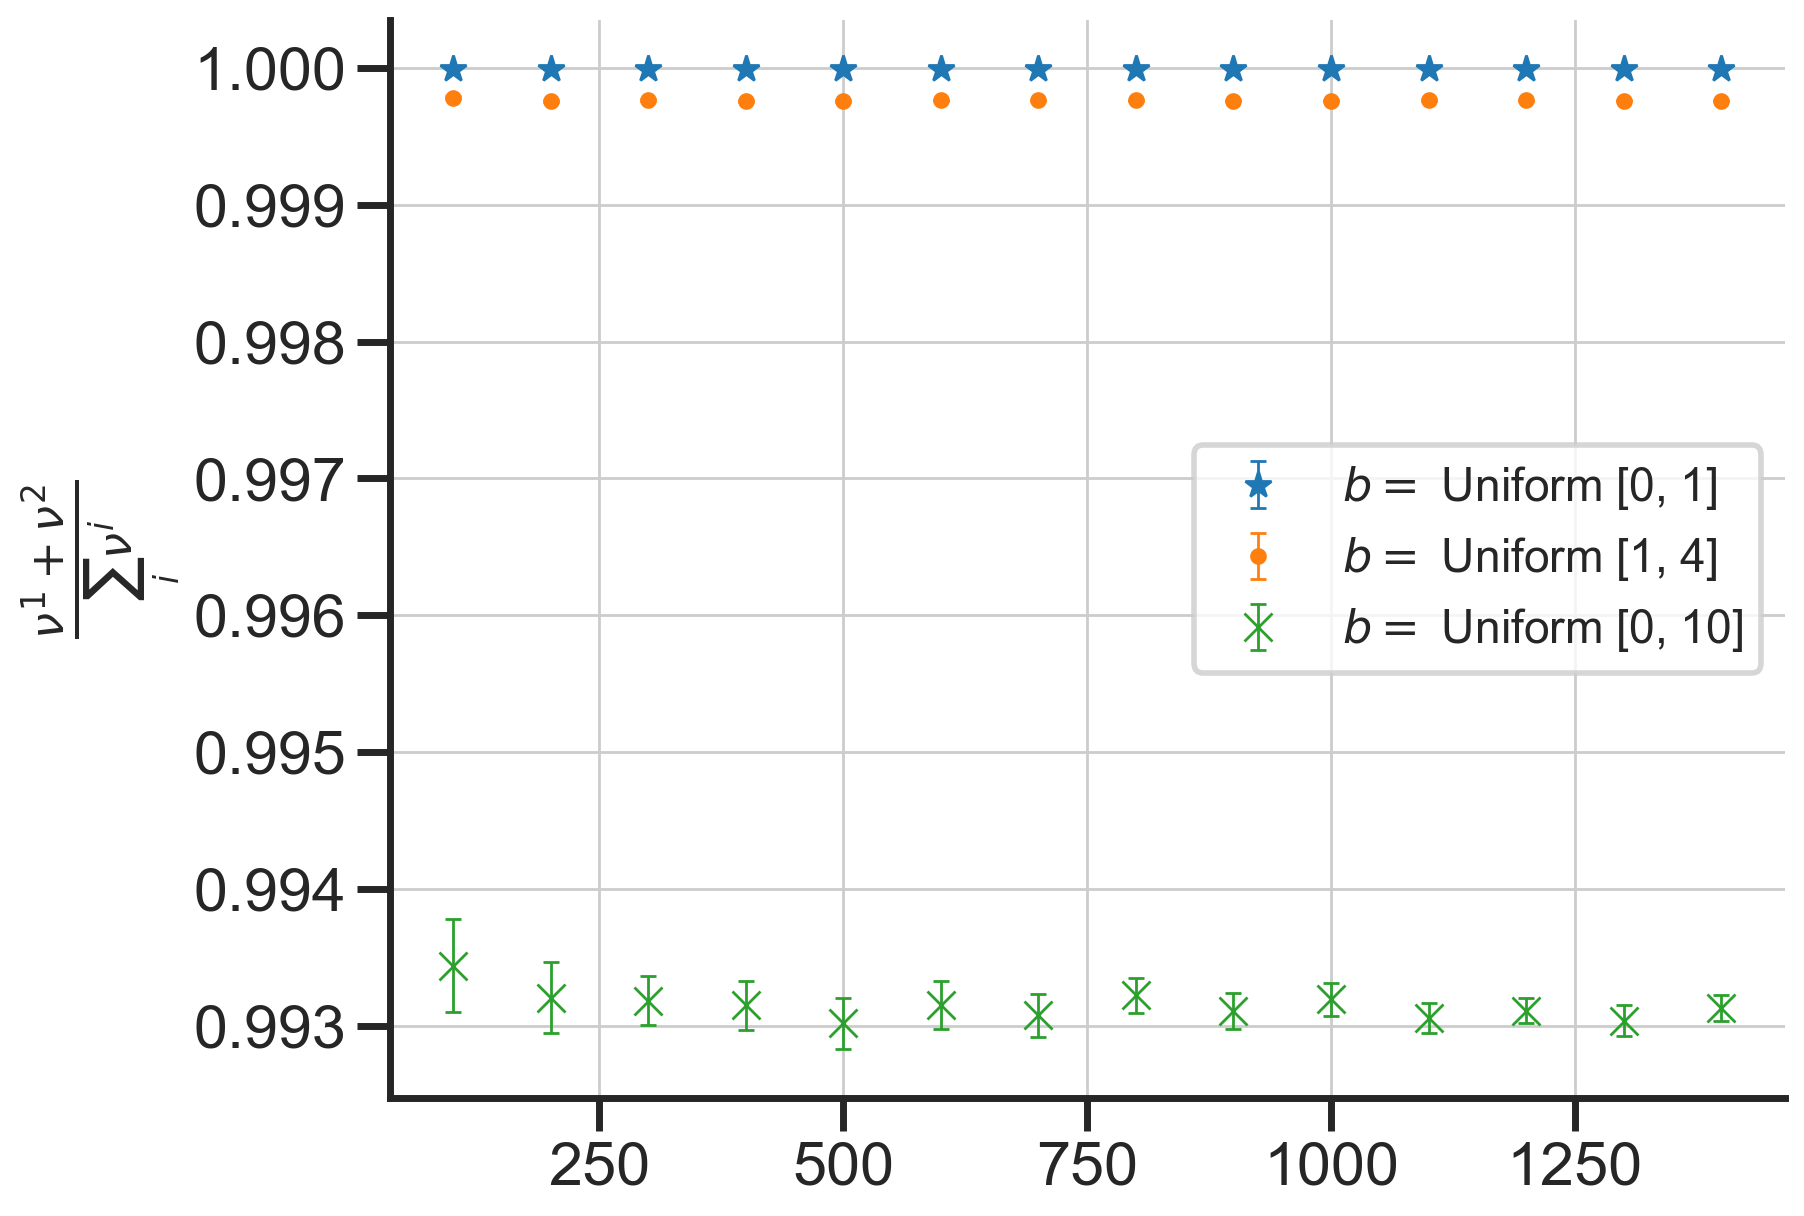

In [11]:
# with two factors
fig, ax = plt.subplots()
ax.errorbar(
    tab_n,
    inertia_b01[:, 1],
    yerr=error_b01[:, 1],
    markersize=MARKERSIZE,
    elinewidth=1,
    fmt="*",
    capsize=CAPSIZE,
    label="$b=$ Uniform [0, 1]",
)
ax.errorbar(
    tab_n,
    inertia_b14[:, 1],
    yerr=error_b14[:, 1],
    markersize=MARKERSIZE,
    elinewidth=1,
    fmt=".",
    capsize=CAPSIZE,
    label="$b=$ Uniform [1, 4]",
)
ax.errorbar(
    tab_n,
    inertia_b010[:, 1],
    yerr=error_b010[:, 1],
    markersize=MARKERSIZE,
    elinewidth=1,
    fmt="x",
    capsize=CAPSIZE,
    label="$b=$ Uniform [0, 10]",
)
ax.set_ylabel(r"$\frac{\nu^1 + \nu^2}{\sum_{i} \nu^i}$")
ax.legend()
plt.show()